<a href="https://colab.research.google.com/github/dornercr/DSCI631/blob/main/wk2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

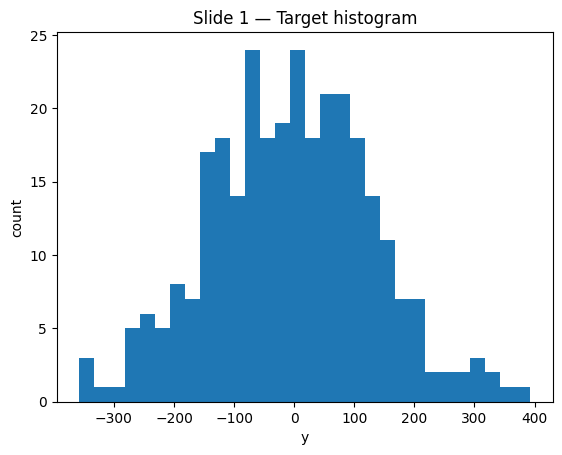

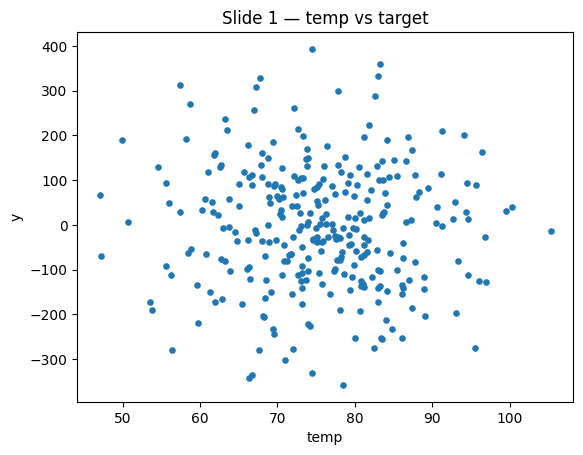

Slide 1 — RMSE: 10.199012319908924


In [6]:
# Slide 1 — Viz-first: see scale/shape → then scale + linear baseline

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1) Tiny dataset (tabular, mixed scales)
X, y = make_regression(n_samples=300, n_features=6, noise=12.0, random_state=0)
rng = np.random.RandomState(1)
weekend = rng.randint(0, 2, size=(X.shape[0], 1))        # 0/1
temp    = rng.normal(75, 10, size=(X.shape[0], 1))       # ~[50..100]
X = np.hstack([X, weekend, temp])

# 2) Viz: target hist + one feature vs target (scale check)
plt.figure(); plt.hist(y, bins=30); plt.title("Slide 1 — Target histogram"); plt.xlabel("y"); plt.ylabel("count"); plt.show()
plt.figure(); plt.scatter(temp, y, s=14); plt.title("Slide 1 — temp vs target"); plt.xlabel("temp"); plt.ylabel("y"); plt.show()

# 3) Baseline: scale → linear model; evaluate RMSE
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=0)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

pipe = Pipeline([("scaler", StandardScaler()), ("model", LinearRegression())])
pipe.fit(X_tr, y_tr)
print("Slide 1 — RMSE:", RMSE(y_va, pipe.predict(X_va)))



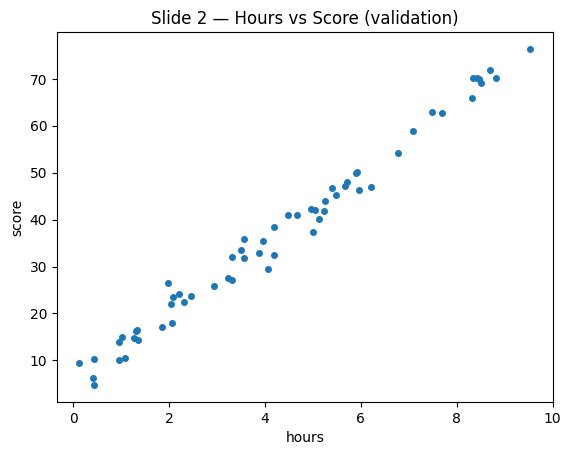

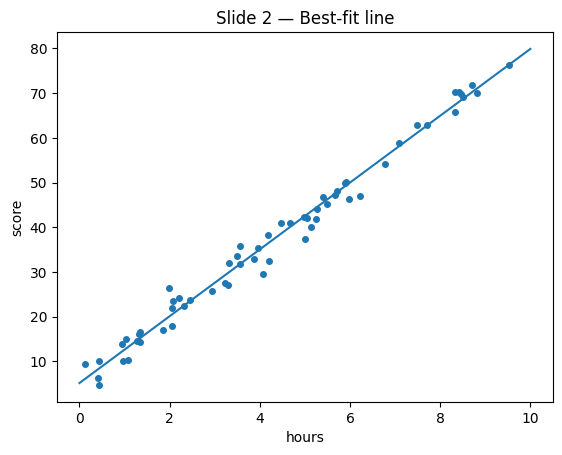

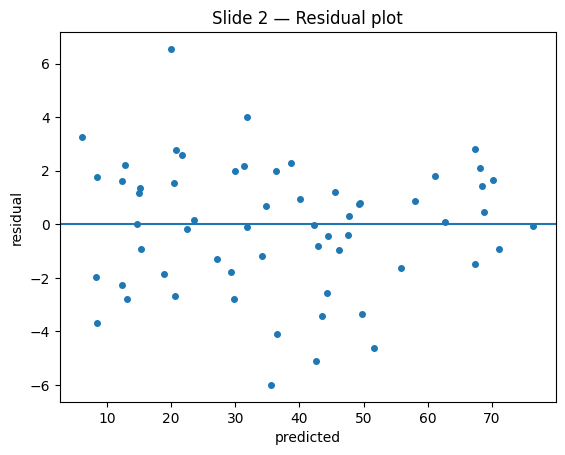

Slide 2 — coef_ [7.47128178] intercept_ 5.18044581498188 RMSE: 2.369624473612749


In [7]:
# Slide 2 — Viz-first: scatter + line; show residuals to justify curved features later

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rng = np.random.RandomState(2)
X = rng.uniform(0, 10, size=(240, 1))                   # "hours"
y = 5 + 7.5*X.ravel() + rng.normal(0, 2.5, size=240)    # score
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=2)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

# Viz: scatter
plt.figure(); plt.scatter(X_va, y_va, s=16); plt.title("Slide 2 — Hours vs Score (validation)"); plt.xlabel("hours"); plt.ylabel("score"); plt.show()

# Fit + line viz
m = LinearRegression().fit(X_tr, y_tr)
xg = np.linspace(0, 10, 200).reshape(-1,1)
plt.figure(); plt.scatter(X_va, y_va, s=16); plt.plot(xg, m.predict(xg)); plt.title("Slide 2 — Best-fit line"); plt.xlabel("hours"); plt.ylabel("score"); plt.show()

# Residuals viz
yhat = m.predict(X_va); resid = y_va - yhat
plt.figure(); plt.scatter(yhat, resid, s=16); plt.axhline(0); plt.title("Slide 2 — Residual plot"); plt.xlabel("predicted"); plt.ylabel("residual"); plt.show()

print("Slide 2 — coef_", m.coef_, "intercept_", m.intercept_, "RMSE:", RMSE(y_va, yhat))


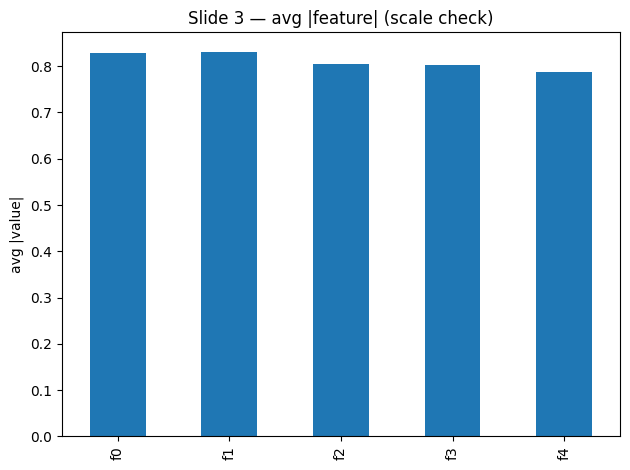

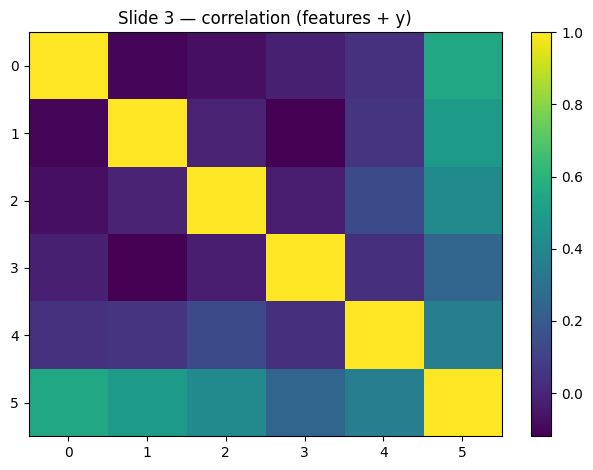

Slide 3 — coef_ [69.00738342 62.99545187 46.31233357 36.34768573 25.47719276] intercept_ 0.47625820578064426 RMSE: 10.866387079508106


In [8]:
# Slide 3 — Viz-first: feature magnitudes + corr; then scale + read coef_

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=300, n_features=5, noise=10.0, random_state=3)
cols = [f"f{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=cols); df["y"] = y

# Viz: scale differences
plt.figure(); df[cols].abs().mean().plot(kind="bar"); plt.title("Slide 3 — avg |feature| (scale check)"); plt.ylabel("avg |value|"); plt.tight_layout(); plt.show()

# Simple corr view
corr = df.corr(numeric_only=True).values
plt.figure(); plt.imshow(corr, aspect="auto"); plt.title("Slide 3 — correlation (features + y)"); plt.colorbar(); plt.tight_layout(); plt.show()

# Model with scaling → read coef_
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=3)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))
pipe = Pipeline([("scaler", StandardScaler()), ("lin", LinearRegression())]).fit(X_tr, y_tr)
lin = pipe.named_steps["lin"]
print("Slide 3 — coef_", lin.coef_, "intercept_", lin.intercept_, "RMSE:", RMSE(y_va, pipe.predict(X_va)))


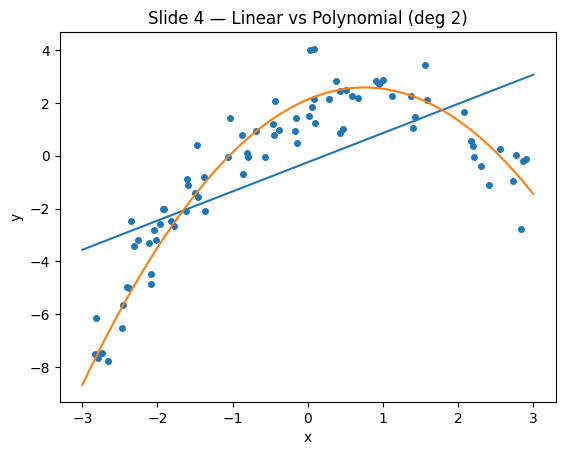

Slide 4 — RMSE linear: 2.183262086581665 | RMSE poly2: 0.9114965751911891


In [9]:
# Slide 4 — Viz-first: curvy data → show line vs poly2

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rng = np.random.RandomState(4)
X = rng.uniform(-3, 3, size=(320,1))
y = 2 + 1.2*X.ravel() - 0.8*(X.ravel()**2) + rng.normal(0,1.0,size=X.shape[0])
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=4)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

# Viz: scatter + fits
lin = LinearRegression().fit(X_tr, y_tr)
poly2 = Pipeline([("poly", PolynomialFeatures(2, include_bias=False)),
                  ("lin", LinearRegression())]).fit(X_tr, y_tr)
xg = np.linspace(-3,3,300).reshape(-1,1)
plt.figure(); plt.scatter(X_va, y_va, s=16); plt.plot(xg, lin.predict(xg)); plt.plot(xg, poly2.predict(xg))
plt.title("Slide 4 — Linear vs Polynomial (deg 2)"); plt.xlabel("x"); plt.ylabel("y"); plt.show()

print("Slide 4 — RMSE linear:", RMSE(y_va, lin.predict(X_va)), "| RMSE poly2:", RMSE(y_va, poly2.predict(X_va)))


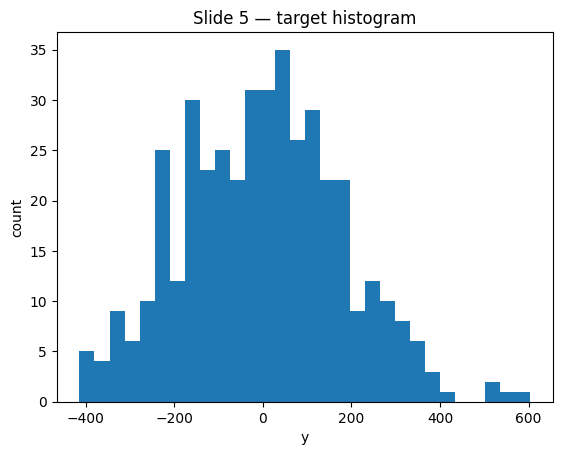

Slide 5 — RMSE closed-form: 12.546975925265317 | RMSE SGD: 12.555419212832712


In [10]:
# Slide 5 — Viz-first: target hist; then LinearRegression vs SGDRegressor

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=420, n_features=8, noise=12.0, random_state=5)
plt.figure(); plt.hist(y, bins=30); plt.title("Slide 5 — target histogram"); plt.xlabel("y"); plt.ylabel("count"); plt.show()

X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=5)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

lin = LinearRegression().fit(X_tr, y_tr)
sgd = SGDRegressor(loss="squared_error", max_iter=2000, tol=1e-3, random_state=5).fit(X_tr, y_tr)

print("Slide 5 — RMSE closed-form:", RMSE(y_va, lin.predict(X_va)), "| RMSE SGD:", RMSE(y_va, sgd.predict(X_va)))


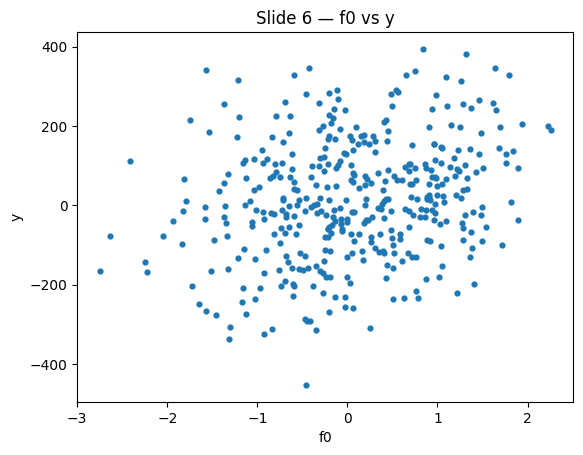

Slide 6 — RMSE: 12.644667018060103


In [11]:
# Slide 6 — Viz-first: scatter a couple features; then basic SGD

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=400, n_features=6, noise=15.0, random_state=6)
plt.figure(); plt.scatter(X[:,0], y, s=12); plt.title("Slide 6 — f0 vs y"); plt.xlabel("f0"); plt.ylabel("y"); plt.show()

X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=6)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))
sgd = SGDRegressor(loss="squared_error", learning_rate="constant", eta0=0.01, max_iter=1500, tol=1e-3, shuffle=True, random_state=6).fit(X_tr, y_tr)
print("Slide 6 — RMSE:", RMSE(y_va, sgd.predict(X_va)))


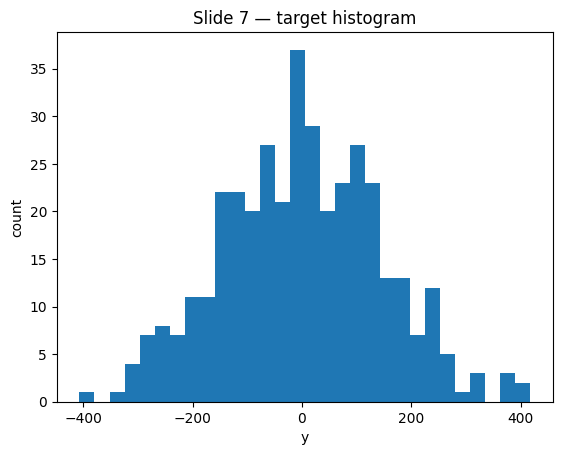

Slide 7 — sweep eta0: {0.001: 11.661235365492232, 0.003: 11.66130166906618, 0.01: 11.60740622942886, 0.03: 12.147696128038776}


In [12]:
# Slide 7 — Viz-first: target hist; then small sweep on eta0

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=380, n_features=6, noise=12.0, random_state=7)
plt.figure(); plt.hist(y, bins=30); plt.title("Slide 7 — target histogram"); plt.xlabel("y"); plt.ylabel("count"); plt.show()

X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=7)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

def score(eta0):
    m = SGDRegressor(loss="squared_error", learning_rate="constant", eta0=eta0, max_iter=1600, tol=1e-3, random_state=7).fit(X_tr, y_tr)
    return RMSE(y_va, m.predict(X_va))

print("Slide 7 — sweep eta0:", {e: score(e) for e in [0.001, 0.003, 0.01, 0.03]})


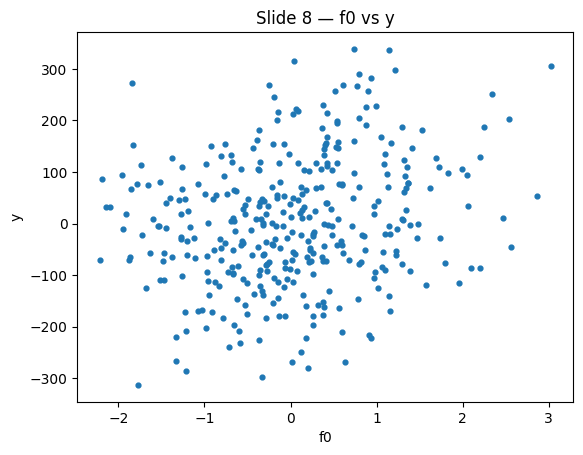

Slide 8 — RMSE constant: 14.734731505398516 | invscaling: 14.938622651562863


In [13]:
# Slide 8 — Viz-first: f0 vs y; then constant vs invscaling schedule

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=360, n_features=6, noise=13.0, random_state=8)
plt.figure(); plt.scatter(X[:,0], y, s=12); plt.title("Slide 8 — f0 vs y"); plt.xlabel("f0"); plt.ylabel("y"); plt.show()

X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=8)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

const = SGDRegressor(loss="squared_error", learning_rate="constant",  eta0=0.01, power_t=0.5, max_iter=1500, tol=1e-3, random_state=8).fit(X_tr, y_tr)
invsc = SGDRegressor(loss="squared_error", learning_rate="invscaling", eta0=0.01, power_t=0.5, max_iter=1500, tol=1e-3, random_state=8).fit(X_tr, y_tr)
print("Slide 8 — RMSE constant:", RMSE(y_va, const.predict(X_va)), "| invscaling:", RMSE(y_va, invsc.predict(X_va)))


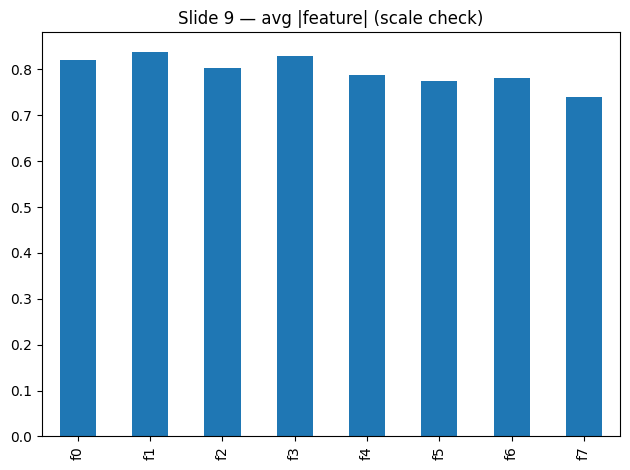

Slide 9 — RMSE (scaled+shuffle): 15.294854881982213


In [14]:
# Slide 9 — Viz-first: show mixed scales; then StandardScaler + shuffle

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=380, n_features=8, noise=18.0, random_state=9)
df = pd.DataFrame(X, columns=[f"f{i}" for i in range(X.shape[1])]); df["y"] = y
plt.figure(); df.drop(columns=["y"]).abs().mean().plot(kind="bar"); plt.title("Slide 9 — avg |feature| (scale check)"); plt.tight_layout(); plt.show()

X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=9)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))
pipe = Pipeline([("scaler", StandardScaler()),
                 ("sgd", SGDRegressor(loss="squared_error", shuffle=True, max_iter=1500, tol=1e-3, random_state=9))]).fit(X_tr, y_tr)
print("Slide 9 — RMSE (scaled+shuffle):", RMSE(y_va, pipe.predict(X_va)))


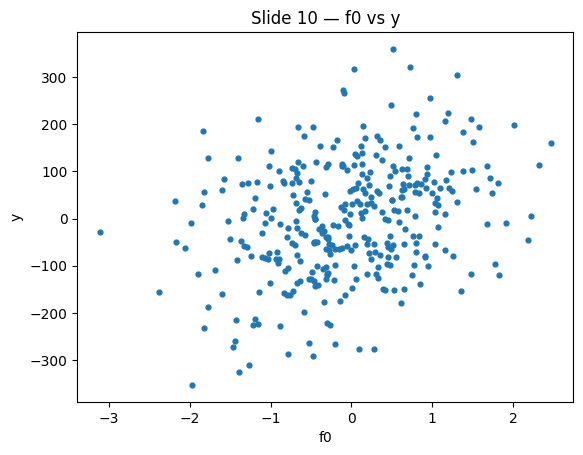

Slide 10 — RMSE: 8.493508336116806


In [15]:
# Slide 10 — Viz-first: simple scatter; then LinearRegression (closed-form)

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=340, n_features=7, noise=10.0, random_state=10)
plt.figure(); plt.scatter(X[:,0], y, s=12); plt.title("Slide 10 — f0 vs y"); plt.xlabel("f0"); plt.ylabel("y"); plt.show()

X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=10)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))
m = LinearRegression().fit(X_tr, y_tr)
print("Slide 10 — RMSE:", RMSE(y_va, m.predict(X_va)))


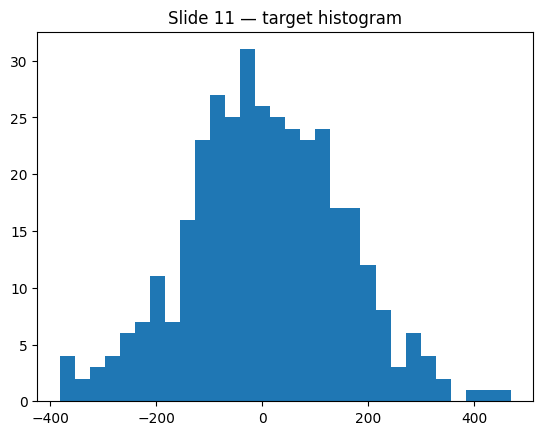

Slide 11 — sweep: {0.001: 13.619655924936307, 0.003: 13.577559490073718, 0.01: 13.869046360154911, 0.03: 13.915474586094144}


In [16]:
# Slide 11 — Viz-first: target hist; then eta0 sweep to pick safe LR

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=360, n_features=6, noise=13.0, random_state=11)
plt.figure(); plt.hist(y, bins=30); plt.title("Slide 11 — target histogram"); plt.show()

X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=11)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))
def score(eta0):
    m = SGDRegressor(loss="squared_error", learning_rate="constant", eta0=eta0, max_iter=1600, tol=1e-3, random_state=11).fit(X_tr, y_tr)
    return RMSE(y_va, m.predict(X_va))
print("Slide 11 — sweep:", {e: score(e) for e in [1e-3, 3e-3, 1e-2, 3e-2]})


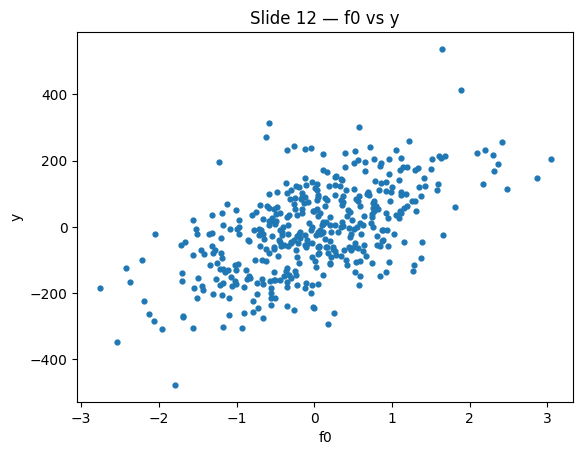

Slide 12 — RMSE: 20.604488398684925


In [17]:
# Slide 12 — Viz-first: f0 vs y; then SGD with decay and early stop

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=420, n_features=6, noise=18.0, random_state=12)
plt.figure(); plt.scatter(X[:,0], y, s=12); plt.title("Slide 12 — f0 vs y"); plt.xlabel("f0"); plt.ylabel("y"); plt.show()

X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=12)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))
sgd = SGDRegressor(loss="squared_error", learning_rate="invscaling", eta0=0.02, max_iter=2000, tol=1e-3, shuffle=True, random_state=12).fit(X_tr, y_tr)
print("Slide 12 — RMSE:", RMSE(y_va, sgd.predict(X_va)))


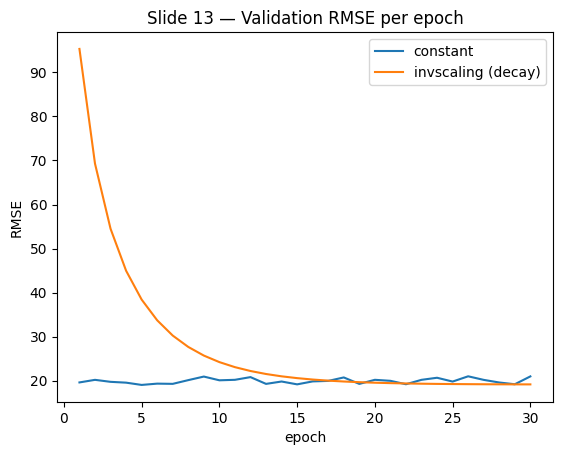

Last-epoch RMSE | constant: 20.988523831089726 | invscaling: 19.175939890524425


In [18]:
# Slide 13 — SGD Learning Schedule (constant vs decaying step)

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# tiny dataset
X, y = make_regression(n_samples=600, n_features=10, noise=18.0, random_state=13)
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=13)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

def run_epochs(learning_rate, eta0, power_t=0.5, batch=64, epochs=30, seed=13):
    rng = np.random.RandomState(seed)
    m = SGDRegressor(loss="squared_error", learning_rate=learning_rate, eta0=eta0,
                     power_t=power_t, max_iter=1, tol=None, shuffle=False, random_state=seed, warm_start=True)
    # bootstrap weights
    i0 = rng.choice(len(X_tr), size=min(batch, len(X_tr)), replace=False)
    m.partial_fit(X_tr[i0], y_tr[i0])
    curve = []
    for ep in range(epochs):
        idx = rng.permutation(len(X_tr))
        for i in range(0, len(idx), batch):
            m.partial_fit(X_tr[idx[i:i+batch]], y_tr[idx[i:i+batch]])
        curve.append(RMSE(y_va, m.predict(X_va)))
    return np.array(curve)

const_curve = run_epochs("constant", eta0=0.02)
decay_curve = run_epochs("invscaling", eta0=0.02, power_t=0.5)

plt.figure()
plt.plot(np.arange(1, len(const_curve)+1), const_curve, label="constant")
plt.plot(np.arange(1, len(decay_curve)+1), decay_curve, label="invscaling (decay)")
plt.title("Slide 13 — Validation RMSE per epoch")
plt.xlabel("epoch"); plt.ylabel("RMSE"); plt.legend(); plt.show()

print("Last-epoch RMSE | constant:", float(const_curve[-1]), "| invscaling:", float(decay_curve[-1]))
# Proper command after viz:
# SGDRegressor(loss="squared_error", learning_rate="invscaling", eta0=0.02, power_t=0.5).fit(X_train, y_train)


RMSE no tol/shuffle: 16.403897830754854
RMSE tol+shuffle  : 16.40272924119256


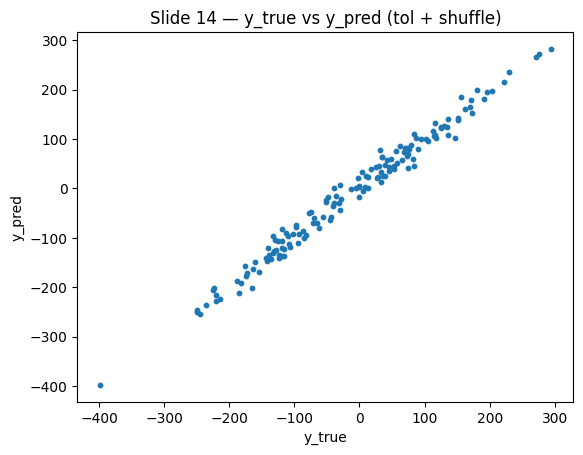

In [19]:
# Slide 14 — Practical SGD: tolerance (early stop) & shuffle (i.i.d.-like passes)

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=500, n_features=8, noise=15.0, random_state=14)
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.3, random_state=14)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

no_tol = SGDRegressor(loss="squared_error", max_iter=5000, tol=None, shuffle=False, random_state=14).fit(X_tr, y_tr)
yes_tol = SGDRegressor(loss="squared_error", max_iter=1000, tol=1e-3, shuffle=True, random_state=14).fit(X_tr, y_tr)

print("RMSE no tol/shuffle:", RMSE(y_va, no_tol.predict(X_va)))
print("RMSE tol+shuffle  :", RMSE(y_va, yes_tol.predict(X_va)))

# Viz: prediction vs actual to show stability equivalence with less work
plt.figure()
plt.scatter(y_va, yes_tol.predict(X_va), s=10)
plt.title("Slide 14 — y_true vs y_pred (tol + shuffle)")
plt.xlabel("y_true"); plt.ylabel("y_pred"); plt.show()

# Proper command:
# SGDRegressor(loss="squared_error", max_iter=1000, tol=1e-3, shuffle=True).fit(X_train, y_train)


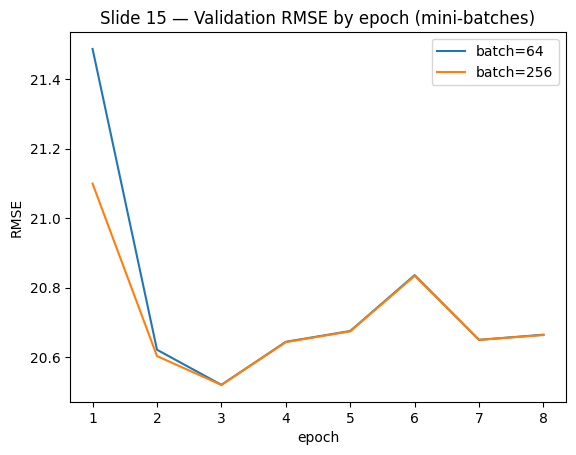

Last RMSE | batch64: 20.664816627313318 | batch256: 20.664011573797495


In [20]:
# Slide 15 — Mini-batch Gradient Descent via partial_fit (balance noise vs cost)

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1200, n_features=12, noise=20.0, random_state=15)
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=15)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

def train_minibatch(batch, epochs=8, seed=15):
    rng = np.random.RandomState(seed)
    m = SGDRegressor(loss="squared_error", learning_rate="invscaling", eta0=0.02,
                     max_iter=1, tol=None, shuffle=False, random_state=seed, warm_start=True)
    # initialize
    m.partial_fit(X_tr[:batch], y_tr[:batch])
    vals = []
    for ep in range(epochs):
        idx = rng.permutation(len(X_tr))
        for i in range(0, len(idx), batch):
            j = idx[i:i+batch]
            m.partial_fit(X_tr[j], y_tr[j])
        vals.append(RMSE(y_va, m.predict(X_va)))
    return np.array(vals)

b64 = train_minibatch(64)
b256 = train_minibatch(256)

plt.figure()
plt.plot(np.arange(1, len(b64)+1), b64, label="batch=64")
plt.plot(np.arange(1, len(b256)+1), b256, label="batch=256")
plt.title("Slide 15 — Validation RMSE by epoch (mini-batches)")
plt.xlabel("epoch"); plt.ylabel("RMSE"); plt.legend(); plt.show()

print("Last RMSE | batch64:", float(b64[-1]), "| batch256:", float(b256[-1]))
# Proper pattern:
# for each batch: model.partial_fit(X_batch, y_batch); check RMSE per epoch; tune batch size.


Slide 16 — RMSE lin: 11.706976135140398 | sgd: 11.703691982205418 | ridge: 11.71696232378009 | lasso: 11.702242264442031


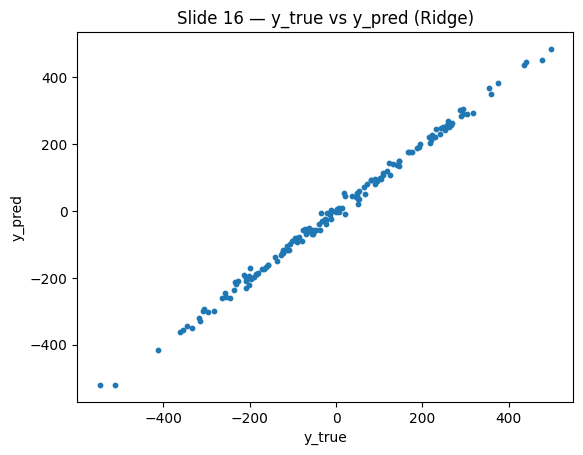

In [21]:
# Slide 16 — Comparing solvers; add regularization when overfitting

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=600, n_features=20, noise=12.0, random_state=16)
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=16)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

lin   = LinearRegression().fit(X_tr, y_tr)
sgd   = SGDRegressor(loss="squared_error", random_state=16).fit(X_tr, y_tr)
ridge = Ridge(alpha=1.0).fit(X_tr, y_tr)
lasso = Lasso(alpha=0.01, max_iter=10000, random_state=16).fit(X_tr, y_tr)

print("Slide 16 — RMSE lin:", RMSE(y_va, lin.predict(X_va)),
      "| sgd:", RMSE(y_va, sgd.predict(X_va)),
      "| ridge:", RMSE(y_va, ridge.predict(X_va)),
      "| lasso:", RMSE(y_va, lasso.predict(X_va)))

# Viz: y_true vs y_pred for ridge (typical winner on overfit risk)
plt.figure(); plt.scatter(y_va, ridge.predict(X_va), s=10)
plt.title("Slide 16 — y_true vs y_pred (Ridge)")
plt.xlabel("y_true"); plt.ylabel("y_pred"); plt.show()

# Proper commands:
# LinearRegression().fit(...); SGDRegressor(...).fit(...); Ridge(alpha=...).fit(...); Lasso(alpha=...).fit(...)


Slide 17 — RMSE lin: 16.018432181163117 | time 0.004s
Slide 17 — RMSE sgd: 16.020986519196697 | time 0.012s


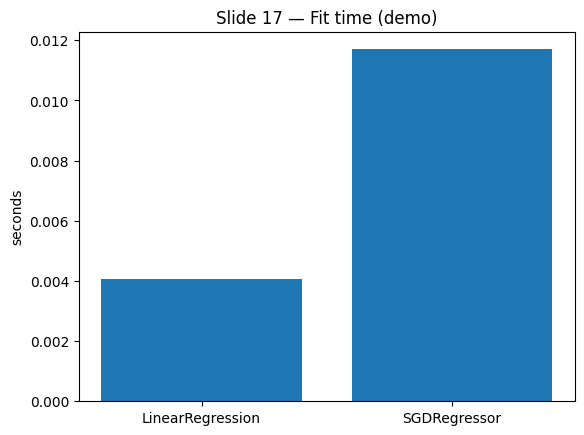

In [23]:
# Slide 17 — Gradient Descent vs Closed Form (pick by scale)

import numpy as np, matplotlib.pyplot as plt, time
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=800, n_features=30, noise=15.0, random_state=17)
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=17)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

t0=time.time(); lin = LinearRegression().fit(X_tr, y_tr); t_lin=time.time()-t0
t0=time.time(); sgd = SGDRegressor(loss="squared_error", max_iter=2000, tol=1e-3, random_state=17).fit(X_tr, y_tr); t_sgd=time.time()-t0

print("Slide 17 — RMSE lin:", RMSE(y_va, lin.predict(X_va)), f"| time {t_lin:.3f}s")
print("Slide 17 — RMSE sgd:", RMSE(y_va, sgd.predict(X_va)), f"| time {t_sgd:.3f}s")

# Viz: quick bar for runtime illustration
plt.figure()
plt.bar(["LinearRegression","SGDRegressor"], [t_lin, t_sgd])
plt.title("Slide 17 — Fit time (demo)")
plt.ylabel("seconds"); plt.show()

# Proper commands:
# LinearRegression().fit(X_train, y_train)  # small/medium
# SGDRegressor(...).fit(X_train, y_train)   # large/s


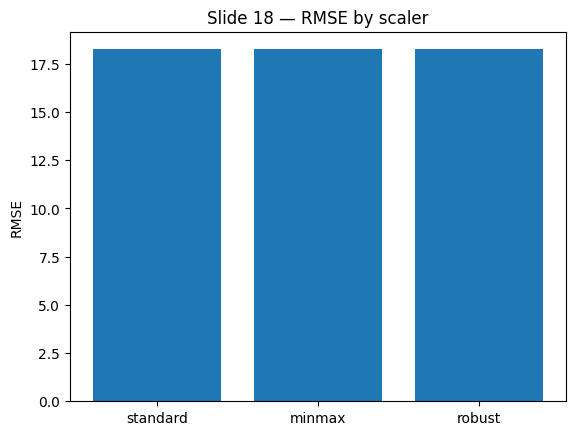

Slide 18 — RMSEs: {'standard': 18.246437893886007, 'minmax': 18.246437893885872, 'robust': 18.246437893885908}


In [24]:
# Slide 18 — Why Feature Scaling (compare scalers in pipelines)

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=500, n_features=10, noise=18.0, random_state=18)
X[:,0] *= 1000  # inject scale mismatch
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=18)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

pipes = {
    "standard": Pipeline([("scaler", StandardScaler()), ("lin", LinearRegression())]),
    "minmax"  : Pipeline([("scaler", MinMaxScaler()),  ("lin", LinearRegression())]),
    "robust"  : Pipeline([("scaler", RobustScaler()),  ("lin", LinearRegression())]),
}
scores = {}
for name, p in pipes.items():
    p.fit(X_tr, y_tr); scores[name] = RMSE(y_va, p.predict(X_va))

plt.figure()
plt.bar(list(scores.keys()), list(scores.values()))
plt.title("Slide 18 — RMSE by scaler")
plt.ylabel("RMSE"); plt.show()

print("Slide 18 — RMSEs:", scores)
# Proper commands:
# Pipeline([("scaler", StandardScaler()), ("model", ...)]).fit(...)


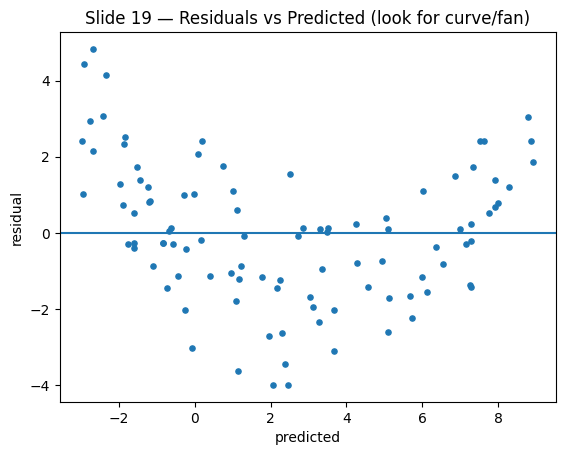

Slide 19 — RMSE (linear): 1.81915205198782


In [25]:
# Slide 19 — Linear Regression assumptions (residual diagnostics)

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rng = np.random.RandomState(19)
X = rng.uniform(-3, 3, size=(400,1))
y = 1.5 + 2.0*X.ravel() + 0.5*(X.ravel()**2) + rng.normal(0,1.2,size=X.shape[0])  # mild curve
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=19)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

m = LinearRegression().fit(X_tr, y_tr)
yhat = m.predict(X_va)

plt.figure()
plt.scatter(yhat, y_va - yhat, s=14)
plt.axhline(0)
plt.title("Slide 19 — Residuals vs Predicted (look for curve/fan)")
plt.xlabel("predicted"); plt.ylabel("residual"); plt.show()

print("Slide 19 — RMSE (linear):", RMSE(y_va, yhat))
# Proper next step when residuals curve:
# PolynomialFeatures(...)+LinearRegression() in a Pipeline.


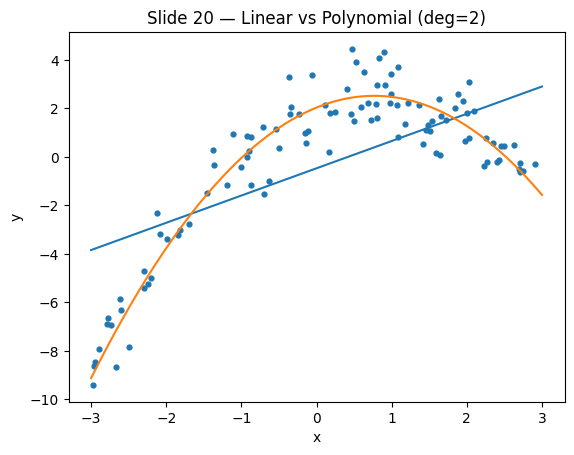

Slide 20 — RMSE linear: 2.3171124700357026
Slide 20 — RMSE poly2 : 0.9490623426944845


In [26]:
# Slide 20 — Polynomial Regression (motivation, degree=2)

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rng = np.random.RandomState(20)
X = rng.uniform(-3, 3, size=(420,1))
y = 2 + 1.2*X.ravel() - 0.8*(X.ravel()**2) + rng.normal(0,1.0,size=X.shape[0])
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=20)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

lin = LinearRegression().fit(X_tr, y_tr)
poly2 = Pipeline([("poly", PolynomialFeatures(2, include_bias=False)), ("lin", LinearRegression())]).fit(X_tr, y_tr)

xg = np.linspace(-3,3,300).reshape(-1,1)
plt.figure(); plt.scatter(X_va, y_va, s=12); plt.plot(xg, lin.predict(xg)); plt.plot(xg, poly2.predict(xg))
plt.title("Slide 20 — Linear vs Polynomial (deg=2)"); plt.xlabel("x"); plt.ylabel("y"); plt.show()

print("Slide 20 — RMSE linear:", float(np.sqrt(mean_squared_error(y_va, lin.predict(X_va)))))
print("Slide 20 — RMSE poly2 :", float(np.sqrt(mean_squared_error(y_va, poly2.predict(X_va)))))
# Proper command:
# Pipeline([("poly", PolynomialFeatures(2, include_bias=False)), ("lin", LinearRegression())]).fit(...)


In [27]:
# Slide 21 — Polynomial Features (train-only fit; evaluate cleanly)

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rng = np.random.RandomState(21)
X = rng.uniform(-2.5, 2.5, size=(380,1))
y = 1 + 0.5*X.ravel() - 0.6*(X.ravel()**2) + 0.2*(X.ravel()**3) + rng.normal(0,0.8,size=X.shape[0])
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=21)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

pipe = Pipeline([("poly", PolynomialFeatures(degree=2, include_bias=False)),
                 ("lin", LinearRegression())]).fit(X_tr, y_tr)
print("Slide 21 — RMSE (deg=2):", RMSE(y_va, pipe.predict(X_va)))
# Proper command already demonstrated (Pipeline with PolynomialFeatures).


Slide 21 — RMSE (deg=2): 1.043683070312287


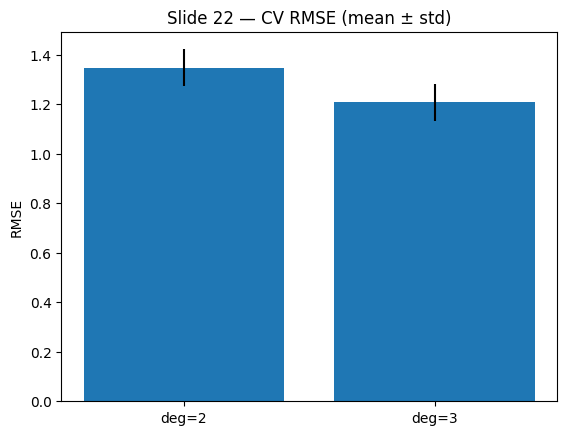

Slide 22 — deg2 mean±std: (np.float64(1.3472059310523938), np.float64(0.07499307507902006)) | deg3 mean±std: (np.float64(1.2076598019370886), np.float64(0.07536425507424538))


In [28]:
# Slide 22 — Higher-degree combos (degree 2 vs 3, compare stability)

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

rng = np.random.RandomState(22)
X = rng.uniform(-3, 3, size=(450,1))
y = 2 + 1.2*X.ravel() - 0.6*(X.ravel()**2) + 0.15*(X.ravel()**3) + rng.normal(0,1.2,size=X.shape[0])

def cv_rmse_deg(k):
    pipe = Pipeline([("poly", PolynomialFeatures(degree=k, include_bias=False)), ("lin", LinearRegression())])
    scores = cross_val_score(pipe, X, y, cv=KFold(5, shuffle=True, random_state=22),
                             scoring=make_scorer(mean_squared_error, greater_is_better=False))
    rmse = np.sqrt(-scores)
    return rmse.mean(), rmse.std()

m2, s2 = cv_rmse_deg(2)
m3, s3 = cv_rmse_deg(3)

plt.figure()
plt.bar(["deg=2","deg=3"], [m2, m3], yerr=[s2, s3])
plt.title("Slide 22 — CV RMSE (mean ± std)")
plt.ylabel("RMSE"); plt.show()

print("Slide 22 — deg2 mean±std:", (m2, s2), "| deg3 mean±std:", (m3, s3))
# Proper command:
# Pipeline([("poly", PolynomialFeatures(degree=k)), ("lin", LinearRegression())])
# + cross_val_score(..., scoring='neg_mean_squared_error')


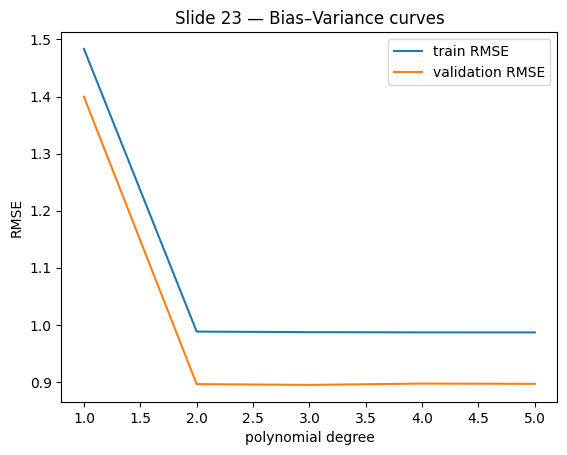

Slide 23 — degrees vs val RMSE: {1: np.float64(1.3993532816851924), 2: np.float64(0.8961983457581535), 3: np.float64(0.8947629887869614), 4: np.float64(0.8971211300379491), 5: np.float64(0.8966538707695791)}


In [29]:
# Slide 23 — Bias–Variance (complexity curves)

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rng = np.random.RandomState(23)
X = rng.uniform(-3, 3, size=(500,1))
y = 2 + 0.8*X.ravel() - 0.4*(X.ravel()**2) + rng.normal(0,1.0,size=X.shape[0])

X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=23)
degrees = [1,2,3,4,5]
train_rmse, val_rmse = [], []
for k in degrees:
    pipe = Pipeline([("poly", PolynomialFeatures(k, include_bias=False)), ("lin", LinearRegression())]).fit(X_tr, y_tr)
    train_rmse.append(np.sqrt(mean_squared_error(y_tr, pipe.predict(X_tr))))
    val_rmse.append(np.sqrt(mean_squared_error(y_va, pipe.predict(X_va))))

plt.figure()
plt.plot(degrees, train_rmse, label="train RMSE")
plt.plot(degrees, val_rmse, label="validation RMSE")
plt.title("Slide 23 — Bias–Variance curves")
plt.xlabel("polynomial degree"); plt.ylabel("RMSE"); plt.legend(); plt.show()

print("Slide 23 — degrees vs val RMSE:", dict(zip(degrees, val_rmse)))
# Proper loop: increase complexity, record train/test RMSE, pick the valley.


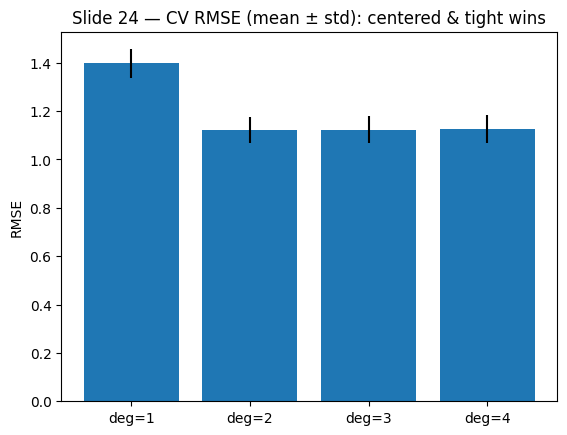

Slide 24 — mean±std by degree: [('deg=1', np.float64(1.396495359255818), np.float64(0.05852657947362335)), ('deg=2', np.float64(1.1206437623658019), np.float64(0.05506432075693819)), ('deg=3', np.float64(1.1223891199548672), np.float64(0.056386355151991106)), ('deg=4', np.float64(1.126552741072501), np.float64(0.05702243919205985))]


In [31]:
# Slide 24 — Bias–Variance (target analogy via K-fold mean & std)

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

rng = np.random.RandomState(24)
X = rng.uniform(-3, 3, size=(480,1))
y = 1 + 0.9*X.ravel() - 0.3*(X.ravel()**2) + rng.normal(0,1.1,size=X.shape[0])

def cv_stats(k):
    pipe = Pipeline([("poly", PolynomialFeatures(k, include_bias=False)), ("lin", LinearRegression())])
    scores = cross_val_score(pipe, X, y, cv=KFold(6, shuffle=True, random_state=24),
                             scoring=make_scorer(mean_squared_error, greater_is_better=False))
    rmse = np.sqrt(-scores)
    return rmse.mean(), rmse.std()

means, stds, labels = [], [], []
for k in [1,2,3,4]:
    m,s = cv_stats(k); means.append(m); stds.append(s); labels.append(f"deg={k}")

plt.figure()
plt.bar(labels, means, yerr=stds)
plt.title("Slide 24 — CV RMSE (mean ± std): centered & tight wins")
plt.ylabel("RMSE"); plt.show()

print("Slide 24 — mean±std by degree:", list(zip(labels, means, stds)))
# Proper command: cross_val_score(...), compare mean (bias proxy) and std (variance proxy).


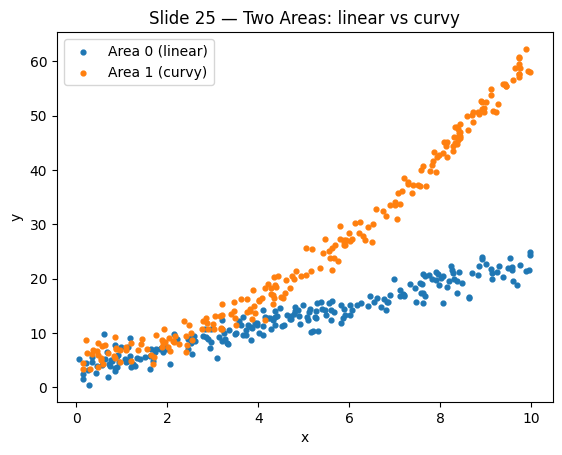

Slide 25 — RMSE (per-area modeling): 1.6774545942899628


In [32]:
# Slide 25 — Two Areas Example (data shape matters)
# Viz: one neighborhood is linear; the other is curved → model them differently.

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rng = np.random.RandomState(25)
n = 220
a0 = rng.uniform(0, 10, size=(n,1)); y0 = 3 + 2.0*a0.ravel() + rng.normal(0, 1.5, n)          # linear
a1 = rng.uniform(0, 10, size=(n,1)); y1 = 5 + 0.7*a1.ravel() + 0.5*(a1.ravel()**2) + rng.normal(0, 1.5, n)  # curve

X = np.vstack([a0, a1]); y = np.hstack([y0, y1])
area = np.hstack([np.zeros(n, int), np.ones(n, int)])[:, None]  # 0 or 1
X_all = np.hstack([X, area])

# Viz: both areas, different shapes
plt.figure()
plt.scatter(a0, y0, s=12, label="Area 0 (linear)")
plt.scatter(a1, y1, s=12, label="Area 1 (curvy)")
plt.title("Slide 25 — Two Areas: linear vs curvy")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

# Proper commands: separate fits
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))
X_tr, X_va, y_tr, y_va, area_tr, area_va = train_test_split(X_all, y, area, test_size=0.25, random_state=25)

mask0_tr = area_tr.ravel()==0; mask1_tr = ~mask0_tr
mask0_va = area_va.ravel()==0; mask1_va = ~mask0_va

lin0 = LinearRegression().fit(X_tr[mask0_tr][:,[0]], y_tr[mask0_tr])  # simple line
poly1 = Pipeline([("poly", PolynomialFeatures(2, include_bias=False)), ("lin", LinearRegression())]).fit(X_tr[mask1_tr][:,[0]], y_tr[mask1_tr])

pred = np.empty_like(y_va)
pred[mask0_va] = lin0.predict(X_va[mask0_va][:,[0]])
pred[mask1_va] = poly1.predict(X_va[mask1_va][:,[0]])

print("Slide 25 — RMSE (per-area modeling):", RMSE(y_va, pred))


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.37345e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.933e+02, tolerance: 1.298e+01
  model = cd_fast.enet_coordinate_descent(


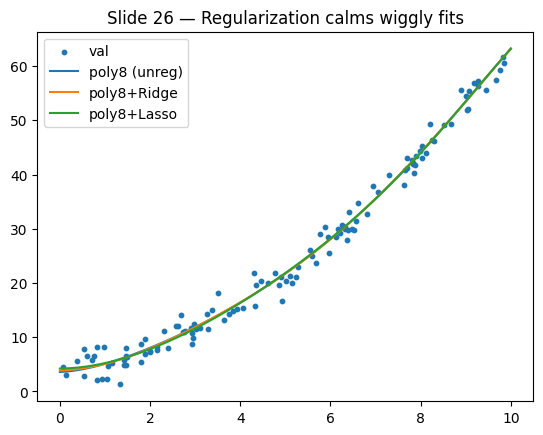

Slide 26 — RMSE: {'unreg': 1.769223503801398, 'ridge': 1.7620033283790755, 'lasso': 1.7695318951738297}


In [33]:
# Slide 26 — Modeling Many Areas (variance warning → regularize)
# Viz: high-degree fits wiggle; Ridge/Lasso calm them.

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

rng = np.random.RandomState(26)
x = rng.uniform(0, 10, size=(500,1))
y = 4 + 1.0*x.ravel() + 0.5*(x.ravel()**2) + rng.normal(0, 2.0, size=x.shape[0])

X_tr, X_va, y_tr, y_va = train_test_split(x, y, test_size=0.25, random_state=26)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

# High-degree unregularized vs Ridge/Lasso
p_deg = 8
unreg = Pipeline([("poly", PolynomialFeatures(p_deg, include_bias=False)), ("lin", LinearRegression())]).fit(X_tr, y_tr)
ridge = Pipeline([("poly", PolynomialFeatures(p_deg, include_bias=False)), ("ridge", Ridge(alpha=10.0))]).fit(X_tr, y_tr)
lasso = Pipeline([("poly", PolynomialFeatures(p_deg, include_bias=False)), ("lasso", Lasso(alpha=0.05, max_iter=20000, random_state=26))]).fit(X_tr, y_tr)

xg = np.linspace(0, 10, 300).reshape(-1,1)
plt.figure()
plt.scatter(X_va, y_va, s=10, label="val")
plt.plot(xg, unreg.predict(xg), label=f"poly{p_deg} (unreg)")
plt.plot(xg, ridge.predict(xg), label=f"poly{p_deg}+Ridge")
plt.plot(xg, lasso.predict(xg), label=f"poly{p_deg}+Lasso")
plt.title("Slide 26 — Regularization calms wiggly fits")
plt.legend(); plt.show()

print("Slide 26 — RMSE:", {"unreg": RMSE(y_va, unreg.predict(X_va)),
                           "ridge": RMSE(y_va, ridge.predict(X_va)),
                           "lasso": RMSE(y_va, lasso.predict(X_va))})


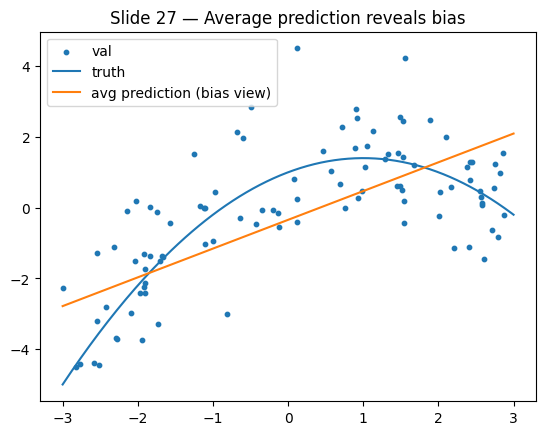

In [34]:
# Slide 27 — Visualizing Bias (average prediction across resamples)
# Viz: average line vs truth shows systematic offset.

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(27)
X = rng.uniform(-3, 3, size=(400,1))
true = 1 + 0.8*X.ravel() - 0.4*(X.ravel()**2)
y = true + rng.normal(0, 1.2, size=X.shape[0])

X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=27)
xg = np.linspace(-3, 3, 200).reshape(-1,1)

# Bootstrap average prediction
preds = []
for b in range(60):
    idx = rng.randint(0, X_tr.shape[0], X_tr.shape[0])
    m = LinearRegression().fit(X_tr[idx], y_tr[idx])
    preds.append(m.predict(xg))
preds = np.vstack(preds)
avg = preds.mean(axis=0)

plt.figure()
plt.scatter(X_va, y_va, s=10, label="val")
plt.plot(xg, 1 + 0.8*xg.ravel() - 0.4*(xg.ravel()**2), label="truth")
plt.plot(xg, avg, label="avg prediction (bias view)")
plt.title("Slide 27 — Average prediction reveals bias")
plt.legend(); plt.show()

# Proper follow-up: add capacity (PolynomialFeatures) if avg is off from truth.


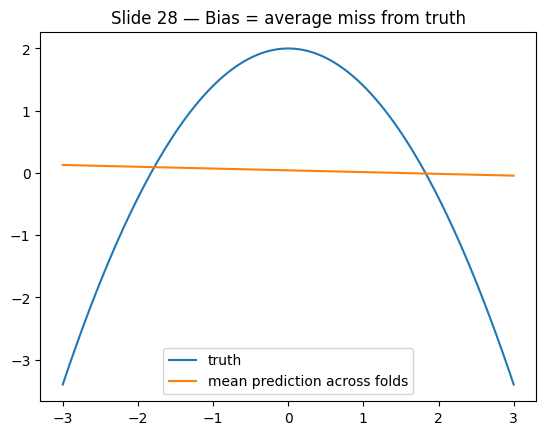

In [35]:
# Slide 28 — Bias (definition focus via CV mean prediction)
# Viz: mean predicted relation vs truth curve.

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(28)
X = rng.uniform(-3, 3, size=(420,1))
true = 2 - 0.6*(X.ravel()**2)
y = true + rng.normal(0, 1.0, size=X.shape[0])

xg = np.linspace(-3, 3, 200).reshape(-1,1)
kf = KFold(n_splits=5, shuffle=True, random_state=28)

preds = []
for tr, va in kf.split(X):
    m = LinearRegression().fit(X[tr], y[tr])
    preds.append(m.predict(xg))
avg = np.vstack(preds).mean(axis=0)

plt.figure()
plt.plot(xg, 2 - 0.6*(xg.ravel()**2), label="truth")
plt.plot(xg, avg, label="mean prediction across folds")
plt.title("Slide 28 — Bias = average miss from truth")
plt.legend(); plt.show()

# Proper follow-up: try PolynomialFeatures if avg is systematically off.


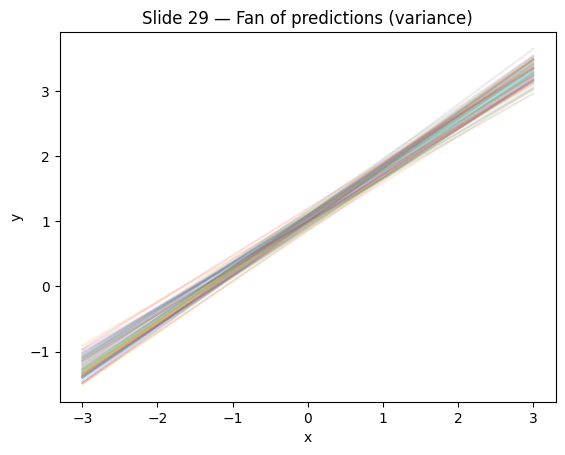

In [36]:
# Slide 29 — Visualizing Variance (fan of lines)
# Viz: many fits → spread (variance) across training samples.

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(29)
X = rng.uniform(-3, 3, size=(400,1))
y = 1 + 0.7*X.ravel() + rng.normal(0, 1.3, size=X.shape[0])

X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=29)
xg = np.linspace(-3, 3, 200).reshape(-1,1)

lines = []
for b in range(60):
    idx = rng.randint(0, X_tr.shape[0], X_tr.shape[0])
    m = LinearRegression().fit(X_tr[idx], y_tr[idx])
    lines.append(m.predict(xg))
lines = np.vstack(lines)

plt.figure()
for i in range(lines.shape[0]):
    plt.plot(xg, lines[i], alpha=0.15)
plt.title("Slide 29 — Fan of predictions (variance)")
plt.xlabel("x"); plt.ylabel("y"); plt.show()

# Proper follow-up: simplify the model or add Ridge/Lasso to reduce spread.


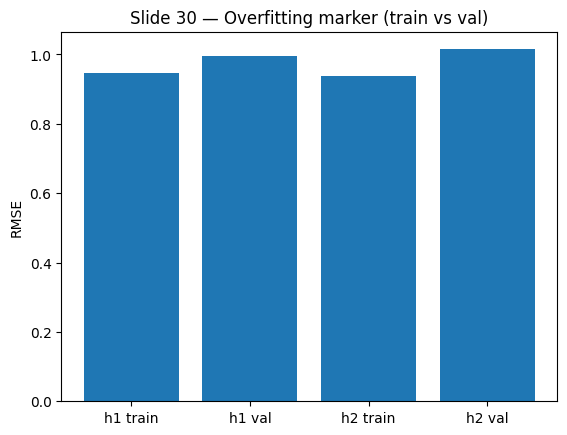

Slide 30 — {'h1_train': 0.9476329915634077, 'h1_val': 0.9966430300065927, 'h2_train': 0.9366168968010739, 'h2_val': 1.0149260406702152}


In [37]:
# Slide 30 — Overfitting Marker (h1 vs h2)
# Viz: compare train/val errors for simple vs complex model.

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rng = np.random.RandomState(30)
X = rng.uniform(-3, 3, size=(420,1))
y = 2 + 0.8*X.ravel() - 0.3*(X.ravel()**2) + rng.normal(0, 1.0, size=X.shape[0])
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=30)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

h1 = Pipeline([("poly", PolynomialFeatures(2, include_bias=False)), ("lin", LinearRegression())]).fit(X_tr, y_tr)
h2 = Pipeline([("poly", PolynomialFeatures(8, include_bias=False)), ("lin", LinearRegression())]).fit(X_tr, y_tr)

train_h1, val_h1 = RMSE(y_tr, h1.predict(X_tr)), RMSE(y_va, h1.predict(X_va))
train_h2, val_h2 = RMSE(y_tr, h2.predict(X_tr)), RMSE(y_va, h2.predict(X_va))

plt.figure()
plt.bar(["h1 train","h1 val","h2 train","h2 val"], [train_h1, val_h1, train_h2, val_h2])
plt.title("Slide 30 — Overfitting marker (train vs val)")
plt.ylabel("RMSE"); plt.show()

print("Slide 30 —", {"h1_train": train_h1, "h1_val": val_h1, "h2_train": train_h2, "h2_val": val_h2})
# Proper action if overfit: simplify degree or add regularization.


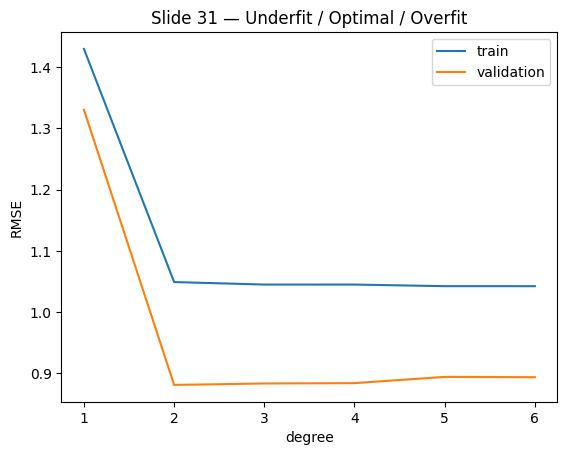

Slide 31 — val RMSE by degree: {1: 1.3304583845384472, 2: 0.8812231787129227, 3: 0.8835695148072417, 4: 0.8841629777145662, 5: 0.8943254731156116, 6: 0.8938119660668721}


In [39]:
# Slide 31 — Underfit vs Optimal vs Overfit
# Viz: train/val RMSE across degrees shows the "just right" point.

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rng = np.random.RandomState(31)
X = rng.uniform(-3, 3, size=(450,1))
y = 2 + 0.9*X.ravel() - 0.4*(X.ravel()**2) + rng.normal(0, 1.0, size=X.shape[0])
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=31)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

degrees = [1,2,3,4,5,6]
train_rmse, val_rmse = [], []
for k in degrees:
    pipe = Pipeline([("poly", PolynomialFeatures(k, include_bias=False)), ("lin", LinearRegression())]).fit(X_tr, y_tr)
    train_rmse.append(RMSE(y_tr, pipe.predict(X_tr)))
    val_rmse.append(RMSE(y_va, pipe.predict(X_va)))

plt.figure()
plt.plot(degrees, train_rmse, label="train")
plt.plot(degrees, val_rmse, label="validation")
plt.title("Slide 31 — Underfit / Optimal / Overfit")
plt.xlabel("degree"); plt.ylabel("RMSE"); plt.legend(); plt.show()

print("Slide 31 — val RMSE by degree:", dict(zip(degrees, val_rmse)))


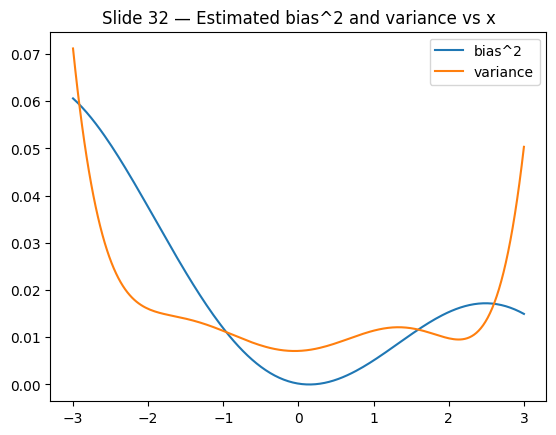

In [41]:
# Slide 32 — Bias–Variance Decomposition (practical estimate)
# Viz: show estimated bias^2 and variance across x for a fixed model.

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(32)
X = rng.uniform(-3, 3, size=(500,1))
true = 1 + 0.8*X.ravel() - 0.2*(X.ravel()**2)
y = true + rng.normal(0, 1.2, size=X.shape[0])

X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=32)
xg = np.linspace(-3, 3, 200).reshape(-1,1)

# pick a model (degree=3)
from sklearn.metrics import mean_squared_error
pipe = Pipeline([("poly", PolynomialFeatures(3, include_bias=False)), ("lin", LinearRegression())]).fit(X_tr, y_tr)

# bootstrap predictions at xg
rng2 = np.random.RandomState(3232)
preds = []
for b in range(80):
    idx = rng2.randint(0, X_tr.shape[0], X_tr.shape[0])
    m = Pipeline([("poly", PolynomialFeatures(3, include_bias=False)), ("lin", LinearRegression())]).fit(X_tr[idx], y_tr[idx])
    preds.append(m.predict(xg))
preds = np.vstack(preds)
avg = preds.mean(axis=0)               # mean prediction
var = preds.var(axis=0)                # variance term
bias2 = (avg - (1 + 0.8*xg.ravel() - 0.2*(xg.ravel()**2)))**2  # bias^2 vs truth

plt.figure()
plt.plot(xg, bias2, label="bias^2")
plt.plot(xg, var, label="variance")
plt.title("Slide 32 — Estimated bias^2 and variance vs x")
plt.legend(); plt.show()

# Proper takeaway: only bias^2 and variance are reducible; noise is not.


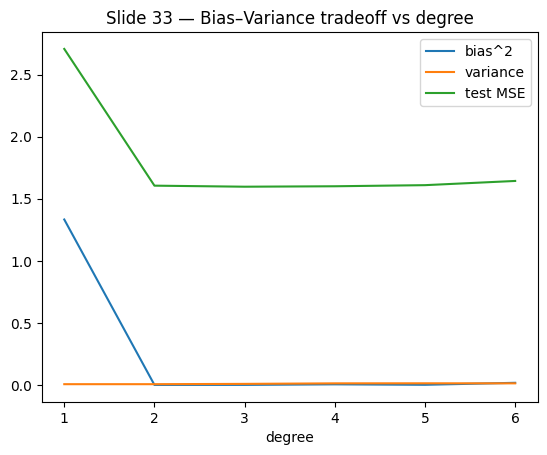

In [42]:
# Slide 33 — Tradeoff Curve (bias^2, variance, test MSE vs complexity)
# Viz: U-shaped test MSE; bias^2 falls, variance rises with degree.

import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rng = np.random.RandomState(33)
X = rng.uniform(-3, 3, size=(500,1))
y_true = 2 + 0.7*X.ravel() - 0.4*(X.ravel()**2)
y = y_true + rng.normal(0, 1.2, size=X.shape[0])

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=33)
degrees = [1,2,3,4,5,6]
test_mse, bias2_list, var_list = [], [], []

# simple resampling estimate of bias^2 and variance at xg center
xg = np.array([[0.0]])
for k in degrees:
    preds = []
    for _ in range(40):
        idx = rng.randint(0, X_tr.shape[0], X_tr.shape[0])
        m = Pipeline([("poly", PolynomialFeatures(k, include_bias=False)), ("lin", LinearRegression())]).fit(X_tr[idx], y_tr[idx])
        preds.append(m.predict(xg)[0])
    preds = np.array(preds)
    avg = preds.mean(); var = preds.var(); bias2 = (avg - (2 + 0.7*0 - 0.4*0))**2
    var_list.append(var); bias2_list.append(bias2)

    model = Pipeline([("poly", PolynomialFeatures(k, include_bias=False)), ("lin", LinearRegression())]).fit(X_tr, y_tr)
    test_mse.append(mean_squared_error(y_te, model.predict(X_te)))

plt.figure()
plt.plot(degrees, bias2_list, label="bias^2")
plt.plot(degrees, var_list, label="variance")
plt.plot(degrees, test_mse, label="test MSE")
plt.title("Slide 33 — Bias–Variance tradeoff vs degree")
plt.xlabel("degree"); plt.legend(); plt.show()

# Proper choice: pick degree near the minimum test MSE.


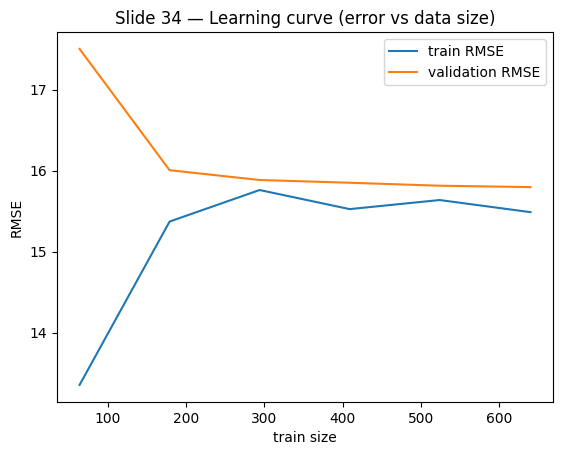

In [43]:
# Slide 34 — Error vs Data Size (learning curve)
# Viz: val error falls with more data until it levels off.

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=800, n_features=12, noise=15.0, random_state=34)
cv = KFold(5, shuffle=True, random_state=34)
train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(), X, y, cv=cv,
    scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 6)
)
train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse   = np.sqrt(-val_scores.mean(axis=1))

plt.figure()
plt.plot(train_sizes, train_rmse, label="train RMSE")
plt.plot(train_sizes, val_rmse, label="validation RMSE")
plt.title("Slide 34 — Learning curve (error vs data size)")
plt.xlabel("train size"); plt.ylabel("RMSE"); plt.legend(); plt.show()

# Proper decision: if val RMSE still drops with size, collect more data; else improve model/features.


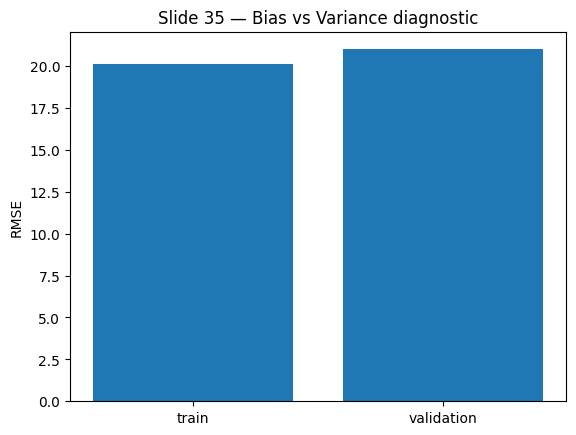

Slide 35 — train: 20.10602852218082 | val: 21.005273243495285


In [44]:
# Slide 35 — Diagnosing Bias vs Variance (train vs validation)
# Viz: one bar for train RMSE, one for validation → read the gap.

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=500, n_features=10, noise=20.0, random_state=35)
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.25, random_state=35)
RMSE = lambda yt, yp: float(np.sqrt(mean_squared_error(yt, yp)))

m = LinearRegression().fit(X_tr, y_tr)
train_rmse, val_rmse = RMSE(y_tr, m.predict(X_tr)), RMSE(y_va, m.predict(X_va))

plt.figure()
plt.bar(["train","validation"], [train_rmse, val_rmse])
plt.title("Slide 35 — Bias vs Variance diagnostic")
plt.ylabel("RMSE"); plt.show()

print("Slide 35 — train:", train_rmse, "| val:", val_rmse)
# If both high → underfit (add features/complexity). If gap large → high variance (regularize/simplify or add data).


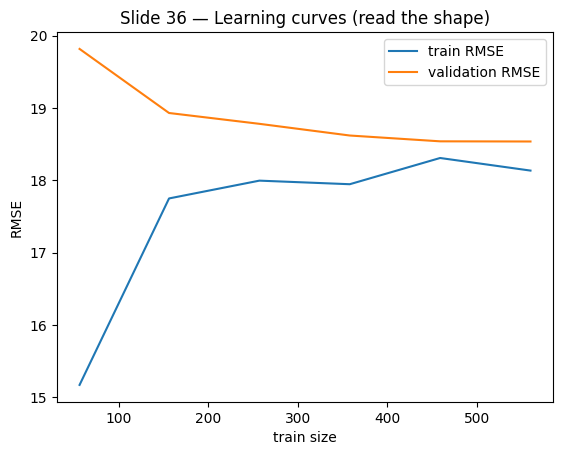

In [45]:
# Slide 36 — Learning Curves (diagnose underfit/overfit)
# Viz: same as Slide 34 but interpret shapes to choose next action.

import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve, KFold
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=700, n_features=10, noise=18.0, random_state=36)
cv = KFold(5, shuffle=True, random_state=36)
train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(), X, y, cv=cv, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 6)
)
train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse   = np.sqrt(-val_scores.mean(axis=1))

plt.figure()
plt.plot(train_sizes, train_rmse, label="train RMSE")
plt.plot(train_sizes, val_rmse, label="validation RMSE")
plt.title("Slide 36 — Learning curves (read the shape)")
plt.xlabel("train size"); plt.ylabel("RMSE"); plt.legend(); plt.show()

# Read:
# - Underfit: both high & close → add features/complexity.
# - Overfit: big gap → regularize/simplify or add more data.
